In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.shape

(100770, 21)

In [4]:
df.head()

,statusText,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,...,sgapt,has3DModel,hasVideo,hasAdditionalAttributions,homeType,priceReductionStr,lotAreaRaw,priceReductionRatio,lat,long
0,House for sale,565000.0,"6648 Logan Ave, Fontana, CA 92336",6648 Logan Ave,Fontana,CA,92336.0,4,3,2362.0,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,6620.0,0.0,34.133167,-117.469734
1,House for sale,520000.0,"9508 Marcona Ave, Fontana, CA 92335",9508 Marcona Ave,Fontana,CA,92335.0,4,2,1362.0,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8663.0,0.0,34.081030,-117.468796
2,House for sale,799900.0,"17625 Hawthorne Ave, Fontana, CA 92335",17625 Hawthorne Ave,Fontana,CA,92335.0,5,3,2683.0,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,16091.0,0.0,34.081074,-117.419740
3,House for sale,519999.0,"16562 Iris Dr, Fontana, CA 92335",16562 Iris Dr,Fontana,CA,92335.0,3,2,1712.0,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,8700.0,0.0,34.072838,-117.442580
4,House for sale,580000.0,"9577 Sultana Ave, Fontana, CA 92335",9577 Sultana Ave,Fontana,CA,92335.0,4,2,1564.0,...,For Sale (Broker),False,False,True,SINGLE_FAMILY,0.0,7300.0,0.0,34.079777,-117.469215


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100770 entries, 0 to 100769
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   statusText                 100770 non-null  object 
 1   unformattedPrice           100770 non-null  float64
 2   address                    100770 non-null  object 
 3   addressStreet              100770 non-null  object 
 4   addressCity                100770 non-null  object 
 5   addressState               100770 non-null  object 
 6   addressZipcode             100770 non-null  float64
 7   beds                       100770 non-null  int64  
 8   baths                      100770 non-null  int64  
 9   area                       100770 non-null  float64
 10  isZillowOwned              100770 non-null  bool   
 11  sgapt                      100770 non-null  object 
 12  has3DModel                 100770 non-null  bool   
 13  hasVideo                   10

In [6]:
df['addressZipcode'] = df['addressZipcode'].astype('str').apply(lambda x: x.replace('.0', ''))
df['beds'] = df['beds'].astype('str')
df['baths'] = df['baths'].astype('str')
df['lat'] = df['beds'].astype('str')
df['long'] = df['baths'].astype('str')

In [7]:
numerical = 0
categorical = 0
boolean = 0

n_ls = []
c_ls = []
b_ls = []

for i in list(df.columns):
    
    if df[i].dtype == 'float64': 
        numerical += 1
        n_ls.append(i)
    elif df[i].dtype == 'bool': 
        boolean += 1
        b_ls.append(i)
    else: 
        categorical += 1
        c_ls.append(i)
        
print('''There are:
{} numerical variables: 
{}

{} categorical variables: 
{}

{} boolean variables: 
{}'''.format(numerical, n_ls, categorical, c_ls, boolean, b_ls))

There are:
5 numerical variables: 
['unformattedPrice', 'area', 'priceReductionStr', 'lotAreaRaw', 'priceReductionRatio']

12 categorical variables: 
['statusText', 'address', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'beds', 'baths', 'sgapt', 'homeType', 'lat', 'long']

4 boolean variables: 
['isZillowOwned', 'has3DModel', 'hasVideo', 'hasAdditionalAttributions']


### Analysis of Numerical Variables

In [8]:
print(n_ls)

['unformattedPrice', 'area', 'priceReductionStr', 'lotAreaRaw', 'priceReductionRatio']


In [9]:
round(df[n_ls].describe(), 4)

,unformattedPrice,area,priceReductionStr,lotAreaRaw,priceReductionRatio
count,1.007700e+05,100770.0000,1.007700e+05,1.007700e+05,100770.0000
mean,4.164648e+05,1759.4697,5.092874e+04,6.629167e+05,0.0081
std,2.790050e+05,682.7452,5.725900e+06,5.708274e+07,0.0366
min,1.100000e+03,105.0000,0.000000e+00,-1.089000e+04,0.0000
25%,2.150000e+05,1271.0000,0.000000e+00,8.710000e+02,0.0000
50%,3.595000e+05,1737.0000,0.000000e+00,5.711358e+03,0.0000
75%,5.590000e+05,2116.0000,0.000000e+00,9.801000e+03,0.0000
max,1.370000e+06,3877.0000,9.580410e+08,1.181565e+10,0.9990


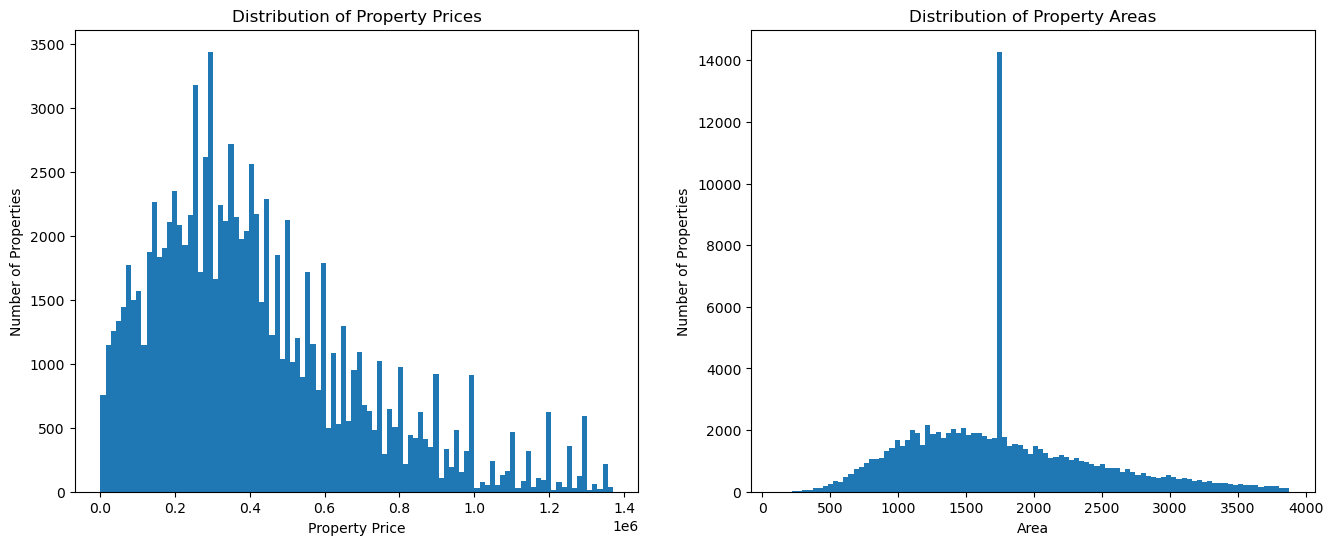

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

axs[0].hist(df['unformattedPrice'], bins =100)
axs[0].set_ylabel("Number of Properties")
axs[0].set_xlabel("Property Price")
axs[0].set_title("Distribution of Property Prices")

axs[1].hist(df['area'], bins =100)
axs[1].set_ylabel("Number of Properties")
axs[1].set_xlabel("Area")
axs[1].set_title("Distribution of Property Areas")

plt.show()

The distribution of property prices is slightly skewed to the right.
We observed that properties have an abnormally high frequency of being a particular size, and we want to know the exact size of these properties. 

In [11]:
df['area'].value_counts().head()

1737.0    12647
1200.0      570
1500.0      395
1400.0      387
1100.0      365
Name: area, dtype: int64

In [12]:
df[df['area'] == 1737][['beds', 'baths']].value_counts()

beds  baths
3     2        8044
      0        1573
2     1         366
4     2         316
3     1         261
               ... 
5     1           1
7     8           1
      7           1
6     1           1
3     7           1
Length: 61, dtype: int64

In [13]:
df['priceReductionStr'].value_counts()

0.0          86630
10000.0       2037
5000.0        1526
20000.0        779
15000.0        608
             ...  
290000.0         1
11062.0          1
24408.0          1
9900000.0        1
20800.0          1
Name: priceReductionStr, Length: 1080, dtype: int64

The majority of properties do not experience a price reduction.

### Analysis of Categorical Variables

In [14]:
c_ls

['statusText',
 'address',
 'addressStreet',
 'addressCity',
 'addressState',
 'addressZipcode',
 'beds',
 'baths',
 'sgapt',
 'homeType',
 'lat',
 'long']

In [15]:
df['addressCity'].value_counts().head(10)

Houston        4956
Chicago        3704
Phoenix        3545
Dallas         2244
Austin         2045
Miami          2013
San Antonio    1767
Louisville     1581
Tucson         1538
New Orleans    1373
Name: addressCity, dtype: int64

In [16]:
df['addressState'].value_counts().head(10)

TX    19457
CA    10245
FL     8950
AZ     8046
IL     4542
NY     4184
LA     3632
GA     2979
TN     2643
NC     2475
Name: addressState, dtype: int64

In [17]:
df['sgapt'].value_counts()

For Sale (Broker)    85759
New Construction     13053
Coming Soon           1110
Foreclosure            700
Unknown Listed By       70
For Sale By Owner       47
RecentChange            27
For Sale by Agent        4
Name: sgapt, dtype: int64

In [18]:
# homeType
df['homeType'].value_counts()

SINGLE_FAMILY    62787
CONDO            16165
LOT               9011
TOWNHOUSE         6327
MULTI_FAMILY      4602
MANUFACTURED      1614
APARTMENT          264
Name: homeType, dtype: int64

In [19]:
np.corrcoef(df['beds'].astype(int), df['baths'].astype(int))

array([[1.        , 0.54482496],
       [0.54482496, 1.        ]])

There is a moderate positive correlation between # of beds and # of baths.

In [20]:
df['total_rooms'] = df['beds'].astype(int)+df['baths'].astype(int)

In [21]:
df['total_rooms'].value_counts()

5     31422
6     18028
4     14902
7     13099
3      8191
8      5737
2      4969
9      2134
10      750
1       635
0       313
11      261
12      199
13       64
14       27
15       22
16       13
18        3
17        1
Name: total_rooms, dtype: int64

In [22]:
df['price/sqft'] = df['unformattedPrice']/df['area']

### Analysis of Boolean Variables

In [23]:
b_ls

['isZillowOwned', 'has3DModel', 'hasVideo', 'hasAdditionalAttributions']

In [24]:
zillow_owned = df['isZillowOwned'].value_counts()

In [25]:
df['has3DModel'].value_counts()

False    91858
True      8912
Name: has3DModel, dtype: int64

In [26]:
df['hasVideo'].value_counts()

False    99126
True      1644
Name: hasVideo, dtype: int64

In [27]:
df['hasAdditionalAttributions'].value_counts()

True     83739
False    17031
Name: hasAdditionalAttributions, dtype: int64

### Analysis of unformattedPrice

<AxesSubplot: title={'center': 'unformattedPrice vs statusText'}, xlabel='unformattedPrice', ylabel='statusText'>

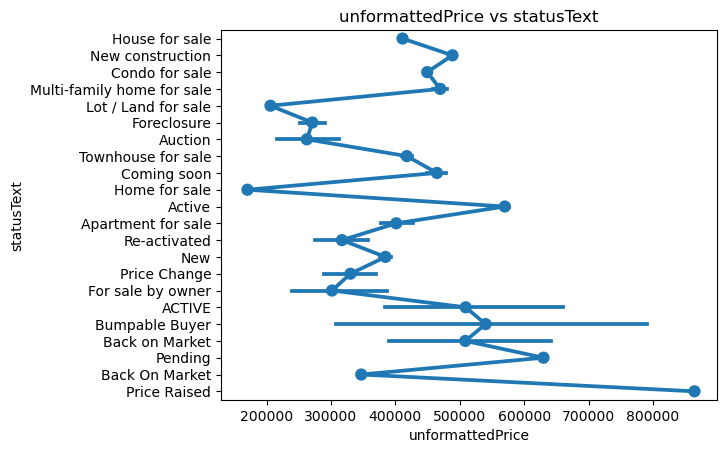

In [28]:
g = sns.pointplot(data=df, y='statusText', x='unformattedPrice')
g.set_title('unformattedPrice vs statusText')
g

<AxesSubplot: title={'center': 'unformattedPrice vs homeType'}, xlabel='unformattedPrice', ylabel='homeType'>

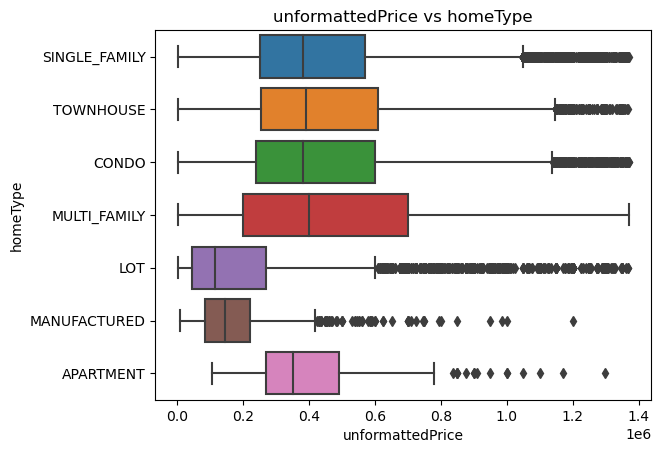

In [29]:
g = sns.boxplot(data=df, y='homeType', x='unformattedPrice', orient='h')
g.set_title('unformattedPrice vs homeType')
g

#### Beds vs. Price

<AxesSubplot: title={'center': 'unformattedPrice vs beds'}, xlabel='unformattedPrice', ylabel='beds'>

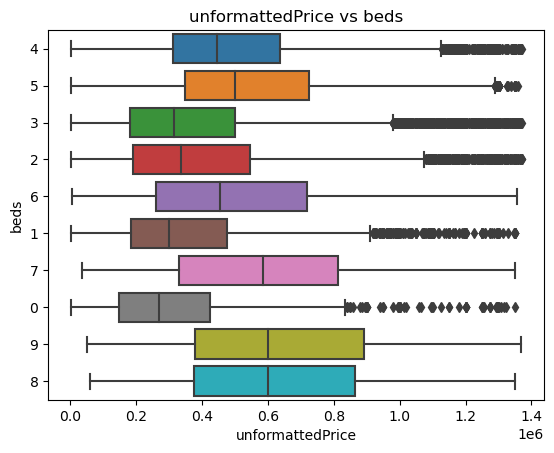

In [30]:
g = sns.boxplot(data=df, y='beds', x='unformattedPrice', orient='h')
g.set_title('unformattedPrice vs beds')
g

In [31]:
df.groupby('beds').mean()[['unformattedPrice', 'area']]

/var/folders/4s/slgnngk162n5t_ts7hcfx3080000gn/T/ipykernel_48954/2311584912.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('beds').mean()[['unformattedPrice', 'area']]


,unformattedPrice,area
beds,,
0,331303.297915,1011.563059
1,357451.644444,833.257639
2,399746.531415,1251.546957
3,375058.830437,1717.962123
4,496653.448821,2290.491171
5,554238.904344,2647.986304
6,516949.742690,2471.941520
7,603458.158672,2506.981550
8,637030.394737,2455.592105


#### Baths vs. Price vs. Area 

<AxesSubplot: title={'center': 'unformattedPrice vs baths'}, xlabel='unformattedPrice', ylabel='baths'>

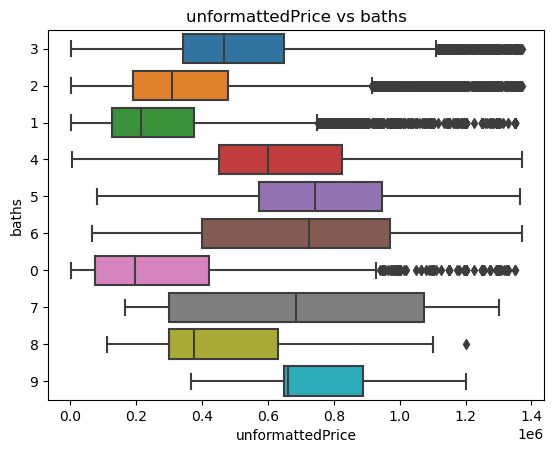

In [32]:
g = sns.boxplot(data=df, y='baths', x='unformattedPrice', orient='h')
g.set_title('unformattedPrice vs baths')
g

In [33]:
df.groupby('baths').mean()[['unformattedPrice', 'area']]

/var/folders/4s/slgnngk162n5t_ts7hcfx3080000gn/T/ipykernel_48954/825825169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('baths').mean()[['unformattedPrice', 'area']]


,unformattedPrice,area
baths,,
0,304766.434518,1755.977549
1,282921.514430,1036.549183
2,367311.227015,1597.572690
3,526273.468621,2207.202131
4,654527.031783,2768.147145
5,764403.607447,3038.680851
6,725286.890511,2664.693431
7,719154.666667,2533.200000
8,494530.769231,1973.692308


#### Beds + Baths vs. Price vs. Area 

In [34]:
df.groupby('total_rooms').mean()[['unformattedPrice', 'area']]

/var/folders/4s/slgnngk162n5t_ts7hcfx3080000gn/T/ipykernel_48954/4177430450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('total_rooms').mean()[['unformattedPrice', 'area']]


,unformattedPrice,area
total_rooms,,
0,374121.172524,1644.006390
1,314979.362205,616.022047
2,336370.675186,813.112900
3,303024.364546,1199.890245
4,367142.489666,1276.861831
5,349178.740532,1633.426580
6,463700.699967,1948.144054
7,530222.889839,2394.113825
8,604192.053164,2740.264773


#### State vs. Price vs. Area vs. Price/Sqft

In [35]:
df.groupby('addressState').mean()[['unformattedPrice', 'area', 'price/sqft']].sort_values(by = 'unformattedPrice', ascending = False).head(10)

/var/folders/4s/slgnngk162n5t_ts7hcfx3080000gn/T/ipykernel_48954/1014546935.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('addressState').mean()[['unformattedPrice', 'area', 'price/sqft']].sort_values(by = 'unformattedPrice', ascending = False).head(10)


,unformattedPrice,area,price/sqft
addressState,,,
WA,703648.170060,1532.837126,518.555720
CA,685159.404197,1509.897706,503.859416
UT,663533.870968,1850.064516,375.392968
MA,659455.036907,1349.008787,611.729093
ID,640416.072937,2081.445298,314.918971
DC,565922.758454,1132.539452,539.161194
CO,550018.488530,1905.583687,324.267016
OR,525119.276682,1727.102668,323.682315
HI,522087.312121,690.136364,841.193519


In [36]:
df.groupby('hasAdditionalAttributions').mean()[['unformattedPrice', 'area', 'price/sqft']].sort_values(by = 'unformattedPrice', ascending = False).head(10)

/var/folders/4s/slgnngk162n5t_ts7hcfx3080000gn/T/ipykernel_48954/1194850828.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('hasAdditionalAttributions').mean()[['unformattedPrice', 'area', 'price/sqft']].sort_values(by = 'unformattedPrice', ascending = False).head(10)


,unformattedPrice,area,price/sqft
hasAdditionalAttributions,,,
False,428962.285597,1688.916857,280.269079
True,413923.014402,1773.818925,253.582398


<AxesSubplot: title={'center': 'unformattedPrice vs hasAdditionalAttributions'}, xlabel='unformattedPrice', ylabel='hasAdditionalAttributions'>

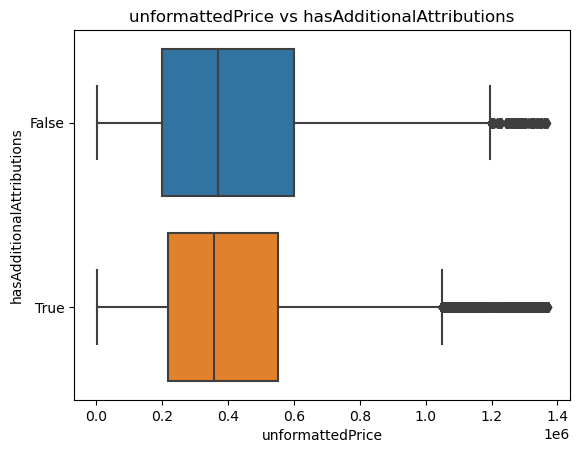

In [37]:
g = sns.boxplot(data = df, y = 'hasAdditionalAttributions', x = 'unformattedPrice', orient='h')
g.set_title('unformattedPrice vs hasAdditionalAttributions')
g

In [38]:
df.groupby('has3DModel').mean()[['unformattedPrice', 'area', 'price/sqft']].sort_values(by = 'unformattedPrice', ascending = False).head(10)

/var/folders/4s/slgnngk162n5t_ts7hcfx3080000gn/T/ipykernel_48954/4286666657.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('has3DModel').mean()[['unformattedPrice', 'area', 'price/sqft']].sort_values(by = 'unformattedPrice', ascending = False).head(10)


,unformattedPrice,area,price/sqft
has3DModel,,,
True,521809.596948,1964.850875,298.105673
False,406244.299473,1739.543807,254.210644


<AxesSubplot: title={'center': 'unformattedPrice vs has3DModel'}, xlabel='unformattedPrice', ylabel='has3DModel'>

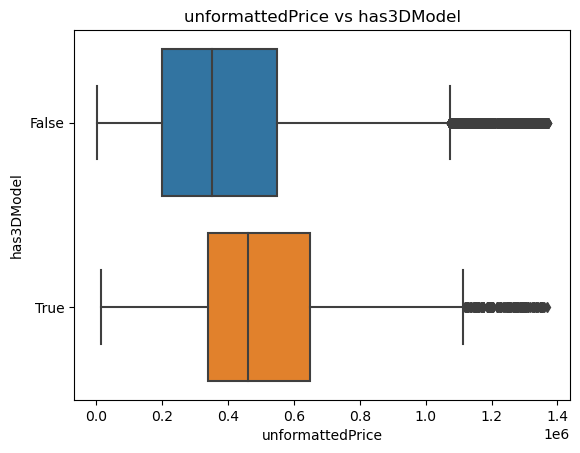

In [39]:
g = sns.boxplot(data = df, y = 'has3DModel', x = 'unformattedPrice', orient='h')
g.set_title('unformattedPrice vs has3DModel')
g

In [40]:
df.groupby('hasVideo').mean()[['unformattedPrice', 'area', 'price/sqft']].sort_values(by = 'unformattedPrice', ascending = False).head(10)

/var/folders/4s/slgnngk162n5t_ts7hcfx3080000gn/T/ipykernel_48954/2402022104.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('hasVideo').mean()[['unformattedPrice', 'area', 'price/sqft']].sort_values(by = 'unformattedPrice', ascending = False).head(10)


,unformattedPrice,area,price/sqft
hasVideo,,,
True,602364.490268,1849.833333,361.906452
False,413381.643232,1757.971067,256.370931


<AxesSubplot: title={'center': 'unformattedPrice vs hasVideo'}, xlabel='unformattedPrice', ylabel='hasVideo'>

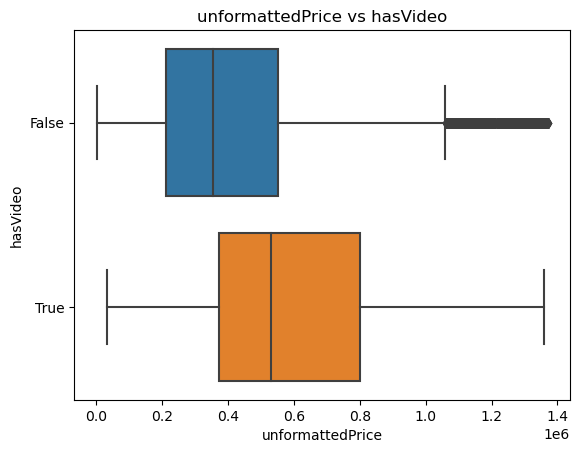

In [41]:
g = sns.boxplot(data = df, y = 'hasVideo', x = 'unformattedPrice', orient='h')
g.set_title('unformattedPrice vs hasVideo')
g

### properties of 1737 sqft

<AxesSubplot: >

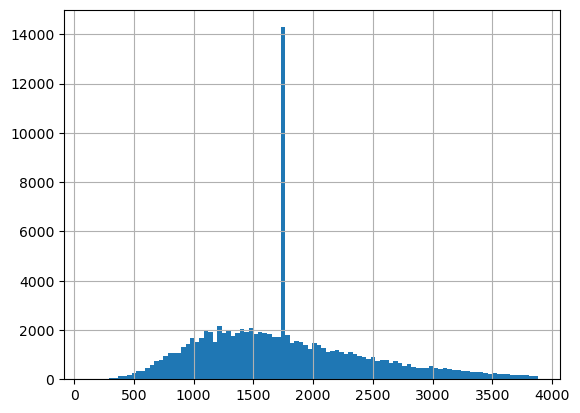

In [42]:
df['area'].hist(bins=100)

In [43]:
df['area'].value_counts()

1737.0    12647
1200.0      570
1500.0      395
1400.0      387
1100.0      365
          ...  
3079.0        1
3708.0        1
483.0         1
3619.0        1
409.0         1
Name: area, Length: 3565, dtype: int64

In [44]:
df[df['area'] == 1737].head()

,statusText,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,...,hasVideo,hasAdditionalAttributions,homeType,priceReductionStr,lotAreaRaw,priceReductionRatio,lat,long,total_rooms,price/sqft
46,Lot / Land for sale,199000.0,"0 Kempster Ave, Fontana, CA 92336",0 Kempster Ave,Fontana,CA,92336,3,2,1737.0,...,False,True,LOT,0.0,13856.0,0.0,3,2,5,114.565343
50,Lot / Land for sale,119000.0,"16139 Athol St, Fontana, CA 92335",16139 Athol St,Fontana,CA,92335,3,2,1737.0,...,False,True,LOT,0.0,12480.0,0.0,3,2,5,68.508923
61,Lot / Land for sale,140000.0,"0 Merrill Ave, Fontana, CA 92335",0 Merrill Ave,Fontana,CA,92335,3,2,1737.0,...,False,True,LOT,0.0,9048.0,0.0,3,2,5,80.598733
96,Lot / Land for sale,258000.0,"7659 Alder Ave, Fontana, CA 92336",7659 Alder Ave,Fontana,CA,92336,3,2,1737.0,...,False,True,LOT,0.0,14080.0,0.0,3,2,5,148.531952
102,Lot / Land for sale,298888.0,"0 Cypress Ave, Fontana, CA 92336",0 Cypress Ave,Fontana,CA,92336,3,2,1737.0,...,False,True,LOT,0.0,8580.0,0.0,3,2,5,172.071387


All these properties are located in different address and priced differently on Zillow, so we assumed that these properties are accurately measured. 

In [45]:
a = df[df['area'] == 1737][['beds', 'baths']].copy()

In [46]:
a['beds'] = a['beds'].astype(int)
a['baths'] = a['baths'].astype(int)

In [47]:
a.mean()

beds     3.051949
baths    1.761445
dtype: float64

In [48]:
df[df['area'] == 1737].groupby('homeType').count()

,statusText,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,...,has3DModel,hasVideo,hasAdditionalAttributions,priceReductionStr,lotAreaRaw,priceReductionRatio,lat,long,total_rooms,price/sqft
homeType,,,,,,,,,,,,,,,,,,,,,
APARTMENT,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
CONDO,634,634,634,634,634,634,634,634,634,634,...,634,634,634,634,634,634,634,634,634,634
LOT,8953,8953,8953,8953,8953,8953,8953,8953,8953,8953,...,8953,8953,8953,8953,8953,8953,8953,8953,8953,8953
MANUFACTURED,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
MULTI_FAMILY,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,...,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186
SINGLE_FAMILY,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,...,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663
TOWNHOUSE,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75


LOT appears to be the most popular home type for houses that are 1737 sq ft.